This code is for plot creation with multiples site - the 4 sites will all be downloaded for specific parameters and only the site #, Datetime, and Parameter will be developed at one time. 

In [1]:
import sys

In [2]:
# This installs the python library that is necessary to be able to easily and automatically retrieve the USGS water data
%pip install -U dataretrieval

Requirement already up-to-date: dataretrieval in c:\programdata\anaconda3\lib\site-packages (0.7)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Here are all the necessary packages to make sure that python can do all the things we want it too
from scipy import stats
import pandas as pd
import numpy as np
import datetime as dt
#from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import dataretrieval.nwis as nwis

In [4]:
# In this cell, I am specifying the site that I want to pull data in for, I have a list below with all of the site numbers and 
# there reference names. This is so that we dont need more than 1 work book for each site. However, we will have to have an 
# idea of the first retreival date, as those will need changed with each run, an estimation is enough because we can get rid
# of any nan data. They are listed beside the sum number and names. The 'end' date is the most recent rate or the current day. 


# specify the USGS site code for which we want data.
site1 = '411605084240800' #site name - Upstream #2021-05-21,2021-06-21
site2 = '411606084240800' #site name - Diversion #2021-09-01, 2021-06-21
site3 = '411607084241200' #site name - Inflow/Pumps # 021-06-21, 2021-06-21
site4 = '411610084240800' #site name - Outflow #2021-09-01, 2021-06-21
Wsite = '411607084241201' #site name - Weather Station #2021- 09-01



# get instantaneous values (iv) ( i.e. gage height, discharge where applicable)
iv1 = nwis.get_record(sites=site1, service='iv', start='2021-05-15', end='2022-01-10')
iv2 = nwis.get_record(sites=site2, service='iv', start='2021-09-01', end='2022-01-10')
iv3 = nwis.get_record(sites=site3, service='iv', start='2021-06-01', end='2022-01-10')
iv4 = nwis.get_record(sites=site4, service='iv', start='2021-09-01', end='2022-01-10')
ivW = nwis.get_record(sites=Wsite, service='iv', start='2021-09-01', end='2022-01-10')





In [5]:
# get water quality samples (qwdata) (all nutrient and SSC data found here)
#df2 = nwis.get_record(sites=site, service='qwdata', start='2021-06-21', end='2021-12-15')
qw1 = nwis.get_record(sites=site1, service='qwdata', start='2021-05-15', end='2022-01-10')
qw2 = nwis.get_record(sites=site2, service='qwdata', start='2021-09-01', end='2022-01-10')
qw3 = nwis.get_record(sites=site3, service='qwdata', start='2021-06-01', end='2022-01-10')
qw4 = nwis.get_record(sites=site4, service='qwdata', start='2021-09-01', end='2022-01-10')
### does not exist duh - only IV. ;  qwW = nwis.get_record(sites=Wsite, service='qwdata', start='2021-09-01', end='2022-01-10')

# get basic info about the site including long/lat data
#df3 = nwis.get_record(sites=site, service='site')

### We are going to blindly pull in all the data at this point as we have no evidence that it isnt working and we know what formats it pulls in from our first iteration of the codes. Then we are going to follow all of the same treatments of the dataframes in an effort to get them to all plot on one single plot. 

If for some reason, the follwoing does not work for you, start by print them out to check for problems ( i.e. use - print(dataframe name) )

In [6]:
# Remove unnecessary columns - we are going to broadly ignore the 3rd data frame as it is just holistic information 
# there has to be a set of these for each site
iv1.drop('99234', inplace=True, axis=1)
iv1.drop('99234_cd', inplace=True, axis=1)
iv1.drop('00065_cd', inplace=True, axis=1)
#iv1.drop('00060_cd', inplace=True, axis=1)

iv2.drop('99234', inplace=True, axis=1)
iv2.drop('99234_cd', inplace=True, axis=1)
iv2.drop('00065_cd', inplace=True, axis=1)
#iv2.drop('00060_cd', inplace=True, axis=1)

iv3.drop('99234', inplace=True, axis=1)
iv3.drop('99234_cd', inplace=True, axis=1)
iv3.drop('00065_cd', inplace=True, axis=1)
#v3.drop('00060_cd', inplace=True, axis=1)

iv4.drop('99234', inplace=True, axis=1)
iv4.drop('99234_cd', inplace=True, axis=1)
iv4.drop('00065_cd', inplace=True, axis=1)
iv4.drop('00060_cd', inplace=True, axis=1)

#for the weather station
#display(list(df.columns.values))
ivW.drop('00045_cd', inplace=True, axis=1)

In [7]:
iv1.rename(columns={'00065': 'gageH','site_no':'site_no'}, inplace=True) #,'00060':'discharge'#
iv1.dropna()

iv2.rename(columns={'00065': 'gageH','site_no':'site_no'}, inplace=True) #,'00060':'discharge'#
iv2.dropna()

iv2.rename(columns={'00065': 'gageH','site_no':'site_no'}, inplace=True) #,'00060':'discharge'#
iv2.dropna()

iv4.rename(columns={'00065': 'gageH','00060':'discharge', 'site_no':'site_no'}, inplace=True) #,'00060':'discharge'#
iv4.dropna()

# This cell is only to deal with weather station data
ivW.rename(columns={'00045': 'precip', 'site_no':'site_no'}, inplace=True) #,'00060':'discharge'#
ivW.dropna()

# the print out is just the last one, if you want to see all of them, you can again print(dataframename)

,precip,site_no
datetime,,
2021-09-29T00:00:00.000-04:00,0.0,411607084241201
2021-09-29T00:15:00.000-04:00,0.0,411607084241201
2021-09-29T00:30:00.000-04:00,0.0,411607084241201
2021-09-29T00:45:00.000-04:00,0.0,411607084241201
2021-09-29T01:00:00.000-04:00,0.0,411607084241201
...,...,...
2022-01-10T22:45:00.000-05:00,0.0,411607084241201
2022-01-10T23:00:00.000-05:00,0.0,411607084241201
2022-01-10T23:15:00.000-05:00,0.0,411607084241201


In [8]:
iv1['datetime'] = iv1.index
iv2['datetime'] = iv2.index
iv3['datetime'] = iv3.index
iv4['datetime'] = iv4.index



In [9]:
iv1['datetime'] = pd.to_datetime(iv1['datetime'])
iv1.dropna()

iv2['datetime'] = pd.to_datetime(iv2['datetime'])
iv2.dropna()

iv3['datetime'] = pd.to_datetime(iv3['datetime'])
iv3.dropna()

iv4['datetime'] = pd.to_datetime(iv4['datetime'])
iv4.dropna()

,discharge,site_no,gageH,datetime
datetime,,,,
2021-09-13T00:00:00.000-04:00,0.0,411610084240800,0.01,2021-09-13 00:00:00-04:00
2021-09-13T00:15:00.000-04:00,0.0,411610084240800,0.01,2021-09-13 00:15:00-04:00
2021-09-13T00:30:00.000-04:00,0.0,411610084240800,0.01,2021-09-13 00:30:00-04:00
2021-09-13T00:45:00.000-04:00,0.0,411610084240800,0.01,2021-09-13 00:45:00-04:00
2021-09-13T01:00:00.000-04:00,0.0,411610084240800,0.01,2021-09-13 01:00:00-04:00
...,...,...,...,...
2022-01-10T22:45:00.000-05:00,0.0,411610084240800,0.04,2022-01-10 22:45:00-05:00
2022-01-10T23:00:00.000-05:00,0.0,411610084240800,0.05,2022-01-10 23:00:00-05:00
2022-01-10T23:15:00.000-05:00,0.0,411610084240800,0.05,2022-01-10 23:15:00-05:00


In [10]:
# again weather station information only 

ivW['datetime'] = ivW.index
ivW['datetime'] = pd.to_datetime(ivW['datetime'])
ivW.dropna()

,precip,site_no,datetime
datetime,,,
2021-09-29T00:00:00.000-04:00,0.0,411607084241201,2021-09-29 00:00:00-04:00
2021-09-29T00:15:00.000-04:00,0.0,411607084241201,2021-09-29 00:15:00-04:00
2021-09-29T00:30:00.000-04:00,0.0,411607084241201,2021-09-29 00:30:00-04:00
2021-09-29T00:45:00.000-04:00,0.0,411607084241201,2021-09-29 00:45:00-04:00
2021-09-29T01:00:00.000-04:00,0.0,411607084241201,2021-09-29 01:00:00-04:00
...,...,...,...
2022-01-10T22:45:00.000-05:00,0.0,411607084241201,2022-01-10 22:45:00-05:00
2022-01-10T23:00:00.000-05:00,0.0,411607084241201,2022-01-10 23:00:00-05:00
2022-01-10T23:15:00.000-05:00,0.0,411607084241201,2022-01-10 23:15:00-05:00


### Now do the same with the nutrients data -- leaving the weather station out. 

In [11]:
qw1.drop(['agency_cd', 'site_no','sample_end_dt','sample_end_tm','tm_datum_rlbty_cd','coll_ent_cd','medium_cd','project_cd',
 'aqfr_cd','tu_id','body_part_id','hyd_cond_cd','samp_type_cd','hyd_event_cd','sample_lab_cm_txt'], inplace=True, axis = 1)

qw2.drop(['agency_cd', 'site_no','sample_end_dt','sample_end_tm','tm_datum_rlbty_cd','coll_ent_cd','medium_cd','project_cd',
 'aqfr_cd','tu_id','body_part_id','hyd_cond_cd','samp_type_cd','hyd_event_cd','sample_lab_cm_txt'], inplace=True, axis = 1)

qw3.drop(['agency_cd', 'site_no','sample_end_dt','sample_end_tm','tm_datum_rlbty_cd','coll_ent_cd','medium_cd','project_cd',
 'aqfr_cd','tu_id','body_part_id','hyd_cond_cd','samp_type_cd','hyd_event_cd','sample_lab_cm_txt'], inplace=True, axis = 1)

qw4.drop(['agency_cd', 'site_no','sample_end_dt','sample_end_tm','tm_datum_rlbty_cd','coll_ent_cd','medium_cd','project_cd',
 'aqfr_cd','tu_id','body_part_id','hyd_cond_cd','samp_type_cd','hyd_event_cd','sample_lab_cm_txt'], inplace=True, axis = 1)

In [12]:
qw1.rename(columns={ 'p00600': "totalnitrogen", 'p00605': "organicnitrogen",'p00608': "Ammonia_N", 
                    'p00625': "AmmoniaplusOrgNitro", 'p00631': "NitrateNitrite", 'p00660': "OrthoPhos_PO4",
                    'p00665': "PasP", 'p00671': "OrthoPasP", 'p00940': "Chloride", 'p71846': "ammoniaNH4",
                    'p80154': "SSC"}, inplace=True)
qw1.dropna()

qw2.rename(columns={ 'p00600': "totalnitrogen", 'p00605': "organicnitrogen",'p00608': "Ammonia_N", 
                    'p00625': "AmmoniaplusOrgNitro", 'p00631': "NitrateNitrite", 'p00660': "OrthoPhos_PO4",
                    'p00665': "PasP", 'p00671': "OrthoPasP", 'p00940': "Chloride", 'p71846': "ammoniaNH4",
                    'p80154': "SSC"}, inplace=True)
qw2.dropna()

qw3.rename(columns={ 'p00600': "totalnitrogen", 'p00605': "organicnitrogen",'p00608': "Ammonia_N", 
                    'p00625': "AmmoniaplusOrgNitro", 'p00631': "NitrateNitrite", 'p00660': "OrthoPhos_PO4",
                    'p00665': "PasP", 'p00671': "OrthoPasP", 'p00940': "Chloride", 'p71846': "ammoniaNH4",
                    'p80154': "SSC"}, inplace=True)
qw3.dropna()

qw4.rename(columns={ 'p00600': "totalnitrogen", 'p00605': "organicnitrogen",'p00608': "Ammonia_N", 
                    'p00625': "AmmoniaplusOrgNitro", 'p00631': "NitrateNitrite", 'p00660': "OrthoPhos_PO4",
                    'p00665': "PasP", 'p00671': "OrthoPasP", 'p00940': "Chloride", 'p71846': "ammoniaNH4",
                    'p80154': "SSC"}, inplace=True)
qw4.dropna()

,totalnitrogen,organicnitrogen,Ammonia_N,AmmoniaplusOrgNitro,NitrateNitrite,OrthoPhos_PO4,PasP,OrthoPasP,Chloride,ammoniaNH4,SSC
datetime,,,,,,,,,,,
2021-10-05 12:30:00+00:00,< 1.6,1.30,0.17,1.50,< 0.1,0.297,0.239,0.097,17.0,0.219,70 @
2021-10-12 09:30:00+00:00,< 1.4,1.20,0.09 *@,1.25 *@,< 0.1 *,0.107,0.096 *@,0.035 *@,17.0 *,0.116,9 *@
2021-10-15 02:40:00+00:00,< 1.3,0.84,0.32 *,1.16 *@,< 0.1 *,0.773,0.330 *@,0.252 *,20.8 *,0.412,20 *@
2021-10-16 07:20:00+00:00,< 1.4,1.20,0.16 *,1.34 *@,< 0.1 *,0.524,0.305 *@,0.171 *,8.0 *,0.206,47 *@
2021-10-18 02:05:00+00:00,< 1.4,1.10,0.14 *,1.27 *@,< 0.1 *,0.294,0.185 *@,0.096 *,8.4 *,0.180,7 *@
2021-10-24 19:35:00+00:00,< 1.0,0.83,0.10 *@,0.93 *@,< 0.1 *,0.175,0.098 *@,0.057 *@,8.6 *,0.129,8 *@
2021-10-27 19:35:00+00:00,< 0.73,0.53,0.10 *@,0.63 *,< 0.1 *,0.239,0.227 *,0.078 *@,4.5 *,0.129,184 *@


In [13]:
qw1['datetime'] = qw1.index
qw2['datetime'] = qw2.index
qw3['datetime'] = qw3.index
qw4['datetime'] = qw4.index


In [14]:
qw1['datetime'] = pd.to_datetime(qw1['datetime'])
qw1.dropna()

qw2['datetime'] = pd.to_datetime(qw2['datetime'])
qw2.dropna()

qw3['datetime'] = pd.to_datetime(qw3['datetime'])
qw3.dropna()

qw4['datetime'] = pd.to_datetime(qw4['datetime'])
qw4.dropna()

,totalnitrogen,organicnitrogen,Ammonia_N,AmmoniaplusOrgNitro,NitrateNitrite,OrthoPhos_PO4,PasP,OrthoPasP,Chloride,ammoniaNH4,SSC,datetime
datetime,,,,,,,,,,,,
2021-10-05 12:30:00+00:00,< 1.6,1.30,0.17,1.50,< 0.1,0.297,0.239,0.097,17.0,0.219,70 @,2021-10-05 12:30:00+00:00
2021-10-12 09:30:00+00:00,< 1.4,1.20,0.09 *@,1.25 *@,< 0.1 *,0.107,0.096 *@,0.035 *@,17.0 *,0.116,9 *@,2021-10-12 09:30:00+00:00
2021-10-15 02:40:00+00:00,< 1.3,0.84,0.32 *,1.16 *@,< 0.1 *,0.773,0.330 *@,0.252 *,20.8 *,0.412,20 *@,2021-10-15 02:40:00+00:00
2021-10-16 07:20:00+00:00,< 1.4,1.20,0.16 *,1.34 *@,< 0.1 *,0.524,0.305 *@,0.171 *,8.0 *,0.206,47 *@,2021-10-16 07:20:00+00:00
2021-10-18 02:05:00+00:00,< 1.4,1.10,0.14 *,1.27 *@,< 0.1 *,0.294,0.185 *@,0.096 *,8.4 *,0.180,7 *@,2021-10-18 02:05:00+00:00
2021-10-24 19:35:00+00:00,< 1.0,0.83,0.10 *@,0.93 *@,< 0.1 *,0.175,0.098 *@,0.057 *@,8.6 *,0.129,8 *@,2021-10-24 19:35:00+00:00
2021-10-27 19:35:00+00:00,< 0.73,0.53,0.10 *@,0.63 *,< 0.1 *,0.239,0.227 *,0.078 *@,4.5 *,0.129,184 *@,2021-10-27 19:35:00+00:00


### Now here is where the code is going to look super icky when we drop all of the junk out of the chart

In [15]:
##This is a check 
# print(qw1.dtypes)
# print(qw2.dtypes)
# print(qw3.dtypes)
# print(qw4.dtypes)

In [16]:
#site1
qw1['totalnitrogen'] = qw1['totalnitrogen'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw1['organicnitrogen'] = qw1['organicnitrogen'].str.replace('[#,,*,/,d,@,&]', '')
qw1['Ammonia_N'] = qw1['Ammonia_N'].str.replace('[#,,*,d,/,@,&]', '')
qw1['AmmoniaplusOrgNitro'] = qw1['AmmoniaplusOrgNitro'].str.replace('[#,,*,d,/,@,&]', '')
qw1['NitrateNitrite'] = qw1['NitrateNitrite'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw1['OrthoPhos_PO4'] = qw1['OrthoPhos_PO4'].str.replace('[#,,*,@,/,d,&]', '')
qw1['PasP'] = qw1['PasP'].str.replace('[#,,*,d,@,/,&]', '')
qw1['OrthoPasP'] = qw1['OrthoPasP'].str.replace('[#,,/,*,@,d,&]', '')
qw1['Chloride'] = qw1['Chloride'].str.replace('[#,,*,d,@,/,&]', '')
#qw1['ammoniaNH4'] = qw1['ammoniaNH4'].str.replace('[#,,*,/,d,@,&]', '')
qw1['SSC'] = qw1['SSC'].str.replace('[#,,*,d,@,/,&]', '')

qw1.dropna()

#site2
qw2['totalnitrogen'] = qw2['totalnitrogen'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw2['organicnitrogen'] = qw2['organicnitrogen'].str.replace('[#,,*,/,d,@,&]', '')
qw2['Ammonia_N'] = qw2['Ammonia_N'].str.replace('[#,,*,d,/,@,&]', '')
qw2['AmmoniaplusOrgNitro'] = qw2['AmmoniaplusOrgNitro'].str.replace('[#,,*,d,/,@,&]', '')
qw2['NitrateNitrite'] = qw2['NitrateNitrite'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw2['OrthoPhos_PO4'] = qw2['OrthoPhos_PO4'].str.replace('[#,,*,@,/,d,&]', '')
qw2['PasP'] = qw2['PasP'].str.replace('[#,,*,d,@,/,&]', '')
qw2['OrthoPasP'] = qw2['OrthoPasP'].str.replace('[#,,/,*,@,d,&]', '')
#qw2['Chloride'] = qw2['Chloride'].str.replace('[#,,*,d,@,/,&]', '')
#qw2['ammoniaNH4'] = qw2['ammoniaNH4'].str.replace('[#,,*,/,d,@,&]', '')
qw2['SSC'] = qw2['SSC'].str.replace('[#,,*,d,@,/,&]', '')

qw2.dropna()

#site3
qw3['totalnitrogen'] = qw3['totalnitrogen'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw3['organicnitrogen'] = qw3['organicnitrogen'].str.replace('[#,,*,/,d,@,&]', '')
qw3['Ammonia_N'] = qw3['Ammonia_N'].str.replace('[#,,*,d,/,@,&]', '')
qw3['AmmoniaplusOrgNitro'] = qw3['AmmoniaplusOrgNitro'].str.replace('[#,,*,d,/,@,&]', '')
qw3['NitrateNitrite'] = qw3['NitrateNitrite'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw3['OrthoPhos_PO4'] = qw3['OrthoPhos_PO4'].str.replace('[#,,*,@,/,d,&]', '')
qw3['PasP'] = qw3['PasP'].str.replace('[#,,*,d,@,/,&]', '')
qw3['OrthoPasP'] = qw3['OrthoPasP'].str.replace('[#,,/,*,@,d,&]', '')
#qw3['Chloride'] = qw3['Chloride'].str.replace('[#,,*,d,@,/,&]', '')
#qw3['ammoniaNH4'] = qw3['ammoniaNH4'].str.replace('[#,,*,/,d,@,&]', '')
qw3['SSC'] = qw3['SSC'].str.replace('[#,,*,d,@,/,&]', '')

qw3.dropna()

#site4
qw4['totalnitrogen'] = qw4['totalnitrogen'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw4['organicnitrogen'] = qw4['organicnitrogen'].str.replace('[#,,*,/,d,@,&]', '')
qw4['Ammonia_N'] = qw4['Ammonia_N'].str.replace('[#,,*,d,/,@,&]', '')
qw4['AmmoniaplusOrgNitro'] = qw4['AmmoniaplusOrgNitro'].str.replace('[#,,*,d,/,@,&]', '')
qw4['NitrateNitrite'] = qw4['NitrateNitrite'].str.replace('[#,<,>,*,/,d,@,&]', '')
#qw4['OrthoPhos_PO4'] = qw4['OrthoPhos_PO4'].str.replace('[#,,*,@,/,d,&]', '')
qw4['PasP'] = qw4['PasP'].str.replace('[#,,*,d,@,/,&]', '')
qw4['OrthoPasP'] = qw4['OrthoPasP'].str.replace('[#,,/,*,@,d,&]', '')
qw4['Chloride'] = qw4['Chloride'].str.replace('[#,,*,d,@,/,&]', '')
#qw4['ammoniaNH4'] = qw4['ammoniaNH4'].str.replace('[#,,*,/,d,@,&]', '')
qw4['SSC'] = qw4['SSC'].str.replace('[#,,*,d,@,/,&]', '')

qw4.dropna()

,totalnitrogen,organicnitrogen,Ammonia_N,AmmoniaplusOrgNitro,NitrateNitrite,OrthoPhos_PO4,PasP,OrthoPasP,Chloride,ammoniaNH4,SSC,datetime
datetime,,,,,,,,,,,,
2021-10-05 12:30:00+00:00,1.6,1.30,0.17,1.50,0.1,0.297,0.239,0.097,17.0,0.219,70,2021-10-05 12:30:00+00:00
2021-10-12 09:30:00+00:00,1.4,1.20,0.09,1.25,0.1,0.107,0.096,0.035,17.0,0.116,9,2021-10-12 09:30:00+00:00
2021-10-15 02:40:00+00:00,1.3,0.84,0.32,1.16,0.1,0.773,0.330,0.252,20.8,0.412,20,2021-10-15 02:40:00+00:00
2021-10-16 07:20:00+00:00,1.4,1.20,0.16,1.34,0.1,0.524,0.305,0.171,8.0,0.206,47,2021-10-16 07:20:00+00:00
2021-10-18 02:05:00+00:00,1.4,1.10,0.14,1.27,0.1,0.294,0.185,0.096,8.4,0.180,7,2021-10-18 02:05:00+00:00
2021-10-24 19:35:00+00:00,1.0,0.83,0.10,0.93,0.1,0.175,0.098,0.057,8.6,0.129,8,2021-10-24 19:35:00+00:00
2021-10-27 19:35:00+00:00,0.73,0.53,0.10,0.63,0.1,0.239,0.227,0.078,4.5,0.129,184,2021-10-27 19:35:00+00:00


In [17]:
#df2.dtypes

In [18]:
#Site1
qw1['totalnitrogen'] = qw1['totalnitrogen'].astype(float)
#qw1['organicnitrogen'] = qw1['organicnitrogen'].astype(float)
qw1['Ammonia_N'] = qw1['Ammonia_N'].astype(float)
qw1['AmmoniaplusOrgNitro'] = qw1['AmmoniaplusOrgNitro'].astype(float)
qw1['NitrateNitrite'] = qw1['NitrateNitrite'].astype(float)
#qw1['OrthoPhos_PO4'] = qw1['OrthoPhos_PO4'].astype(float)
qw1['PasP'] = qw1['PasP'].astype(float)
qw1['OrthoPasP'] = qw1['OrthoPasP'].astype(float)
qw1['Chloride']= qw1['Chloride'].astype(float)
#qw1['ammoniaNH4'] = qw1['ammoniaNH4'].astype(float)
qw1['SSC'] = qw1['SSC'].astype(float)

#site2
qw2['totalnitrogen'] = qw2['totalnitrogen'].astype(float)
#qw2['organicnitrogen'] = qw2['organicnitrogen'].astype(float)
qw2['Ammonia_N'] = qw2['Ammonia_N'].astype(float)
qw2['AmmoniaplusOrgNitro'] = qw2['AmmoniaplusOrgNitro'].astype(float)
qw2['NitrateNitrite'] = qw2['NitrateNitrite'].astype(float)
#qw2['OrthoPhos_PO4'] = qw2['OrthoPhos_PO4'].astype(float)
qw2['PasP'] = qw2['PasP'].astype(float)
qw2['OrthoPasP'] = qw2['OrthoPasP'].astype(float)
qw2['Chloride']=qw2['Chloride'].astype(float)
#qw2['ammoniaNH4'] = qw2['ammoniaNH4'].astype(float)
qw2['SSC'] = qw2['SSC'].astype(float)

#site3
qw3['totalnitrogen'] = qw3['totalnitrogen'].astype(float)
#qw3['organicnitrogen'] = qw3['organicnitrogen'].astype(float)
qw3['Ammonia_N'] = qw3['Ammonia_N'].astype(float)
qw3['AmmoniaplusOrgNitro'] = qw3['AmmoniaplusOrgNitro'].astype(float)
qw3['NitrateNitrite'] = qw3['NitrateNitrite'].astype(float)
#qw3['OrthoPhos_PO4'] = qw3['OrthoPhos_PO4'].astype(float)
qw3['PasP'] = qw3['PasP'].astype(float)
qw3['OrthoPasP'] = qw3['OrthoPasP'].astype(float)
qw3['Chloride']=qw3['Chloride'].astype(float)
#qw3['ammoniaNH4'] = qw3['ammoniaNH4'].astype(float)
qw3['SSC'] = qw3['SSC'].astype(float)

#site4
qw4['totalnitrogen'] = qw4['totalnitrogen'].astype(float)
#qw4['organicnitrogen'] = qw4['organicnitrogen'].astype(float)
qw4['Ammonia_N'] = qw4['Ammonia_N'].astype(float)
qw4['AmmoniaplusOrgNitro'] = qw4['AmmoniaplusOrgNitro'].astype(float)
qw4['NitrateNitrite'] = qw4['NitrateNitrite'].astype(float)
#qw4['OrthoPhos_PO4'] = qw4['OrthoPhos_PO4'].astype(float)
qw4['PasP'] = qw4['PasP'].astype(float)
qw4['OrthoPasP'] = qw4['OrthoPasP'].astype(float)
qw4['Chloride']= qw4['Chloride'].astype(float)
#qw4['ammoniaNH4'] = qw4['ammoniaNH4'].astype(float)
qw4['SSC'] = qw4['SSC'].astype(float)


In [70]:
import matplotlib.colors as mcolors

### From here - The plotting codes going to start with a plot for each nutrient at all of the sites and then nutrient plus gaging data/discharge

<Figure size 432x288 with 0 Axes>

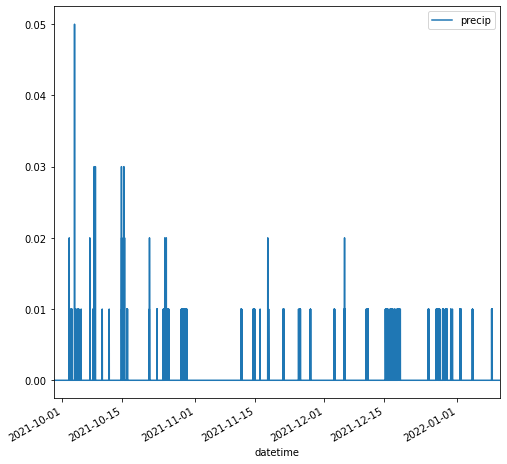

In [54]:
fig1 = plt.figure()
ax = ivW.plot(x='datetime', y='precip', figsize=(8, 8))

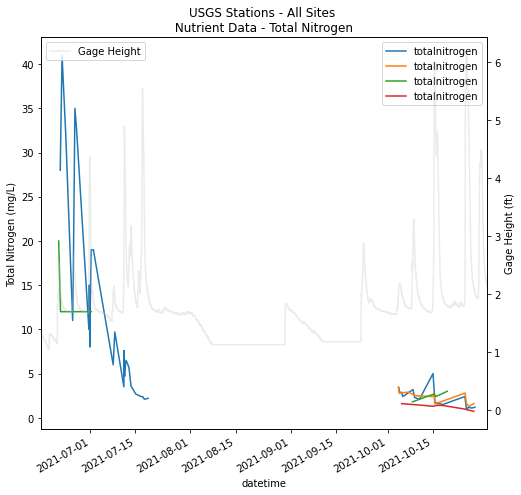

In [84]:
# Nitrogen Total Plot

# Total Nitrogen

#fig,ax = plt.subplots(figsize=(8, 8))
ax = qw1.plot(x='datetime', y='totalnitrogen', figsize=(8, 8))
ax = qw2.plot(ax=ax, x='datetime', y='totalnitrogen')
ax = qw3.plot(ax=ax, x='datetime', y='totalnitrogen')
ax = qw4.plot(ax=ax, x='datetime', y='totalnitrogen')
ax2 = ax.twinx()
#ax2 = ivW.plot(ax=ax2, x ='datetime', y = 'precip', color='silver', alpha=0.3) #to add precipitation
ax2 = iv1.plot(ax=ax2, x ='datetime', y = 'gageH', color='silver', alpha=0.3) #to add gaging or discharge
plt.title('USGS Stations - All Sites \n Nutrient Data - Total Nitrogen '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax2.legend(['Gage Height'], loc=0)
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
ax.set_ylabel('Total Nitrogen (mg/L)')
#ax2.set_ylabel('Precipitation (in)');
ax2.set_ylabel('Gage Height (ft)');



#plt.savefig("totnitro.png")

<Figure size 432x288 with 0 Axes>

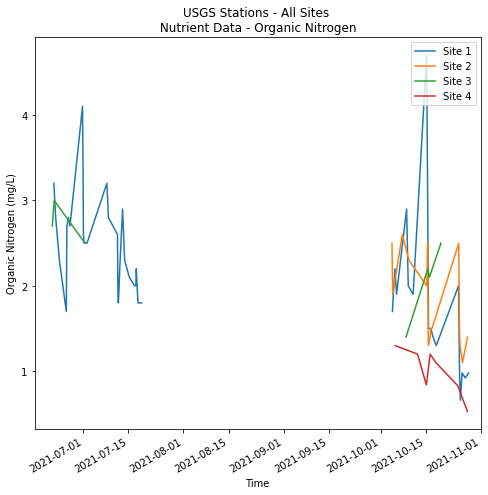

In [41]:
# Organic Nitrogen Plot

# Organic Nitrogen

fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='organicnitrogen', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='organicnitrogen')
qw3.plot(ax=ax, x='datetime', y='organicnitrogen')
qw4.plot(ax=ax, x='datetime', y='organicnitrogen')



plt.title('USGS Stations - All Sites \n Nutrient Data - Organic Nitrogen '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Organic Nitrogen (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

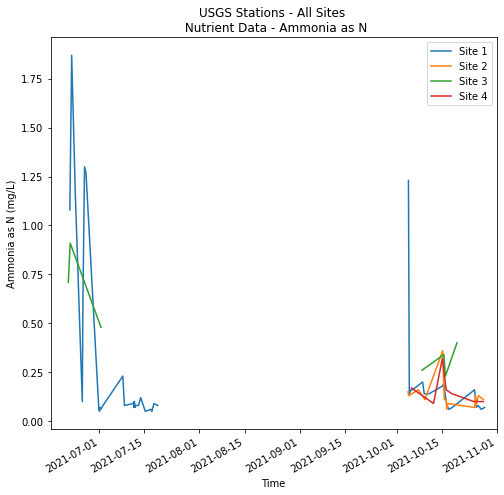

In [42]:
# Plot as Ammonia_N 

fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='Ammonia_N', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='Ammonia_N')
qw3.plot(ax=ax, x='datetime', y='Ammonia_N')
qw4.plot(ax=ax, x='datetime', y='Ammonia_N')



plt.title('USGS Stations - All Sites \n Nutrient Data - Ammonia as N'); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Ammonia as N (mg/L)');


#plt.savefig("AmmN.png")

<Figure size 432x288 with 0 Axes>

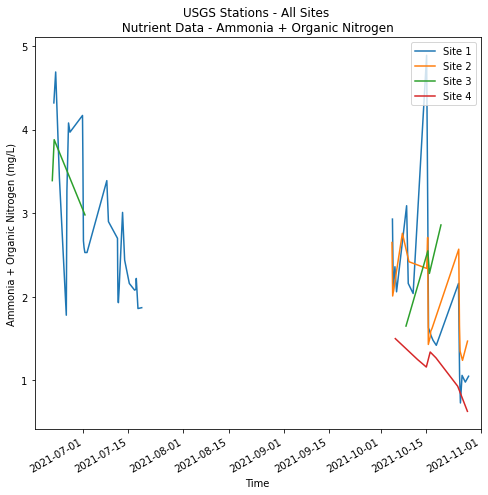

In [44]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='AmmoniaplusOrgNitro', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='AmmoniaplusOrgNitro')
qw3.plot(ax=ax, x='datetime', y='AmmoniaplusOrgNitro')
qw4.plot(ax=ax, x='datetime', y='AmmoniaplusOrgNitro')



plt.title('USGS Stations - All Sites \n Nutrient Data - Ammonia + Organic Nitrogen '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Ammonia + Organic Nitrogen (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

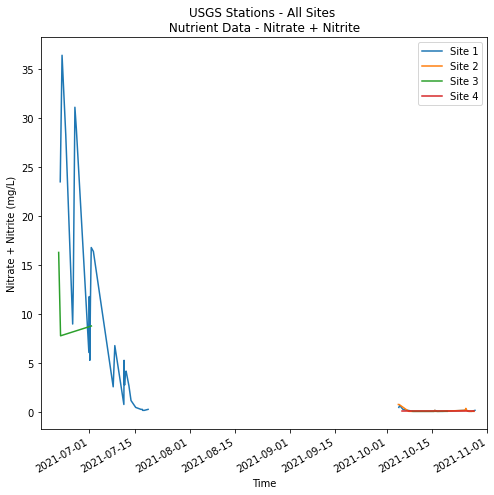

In [45]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='NitrateNitrite', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='NitrateNitrite')
qw3.plot(ax=ax, x='datetime', y='NitrateNitrite')
qw4.plot(ax=ax, x='datetime', y='NitrateNitrite')



plt.title('USGS Stations - All Sites \n Nutrient Data - Nitrate + Nitrite '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Nitrate + Nitrite (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

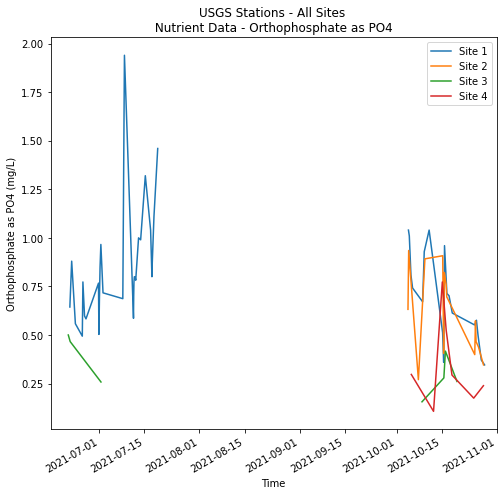

In [46]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='OrthoPhos_PO4', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='OrthoPhos_PO4')
qw3.plot(ax=ax, x='datetime', y='OrthoPhos_PO4')
qw4.plot(ax=ax, x='datetime', y='OrthoPhos_PO4')



plt.title('USGS Stations - All Sites \n Nutrient Data - Orthophosphate as PO4 '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Orthophosphate as PO4 (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

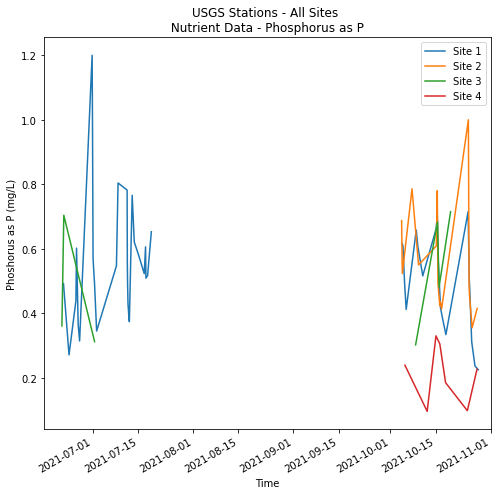

In [47]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='PasP', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='PasP')
qw3.plot(ax=ax, x='datetime', y='PasP')
qw4.plot(ax=ax, x='datetime', y='PasP')



plt.title('USGS Stations - All Sites \n Nutrient Data - Phosphorus as P '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Phoshorus as P (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

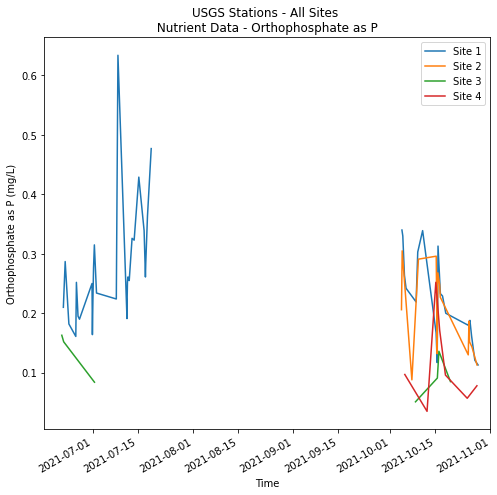

In [48]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='OrthoPasP', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='OrthoPasP')
qw3.plot(ax=ax, x='datetime', y='OrthoPasP')
qw4.plot(ax=ax, x='datetime', y='OrthoPasP')



plt.title('USGS Stations - All Sites \n Nutrient Data - Orthophosphate as P '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Orthophosphate as P (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

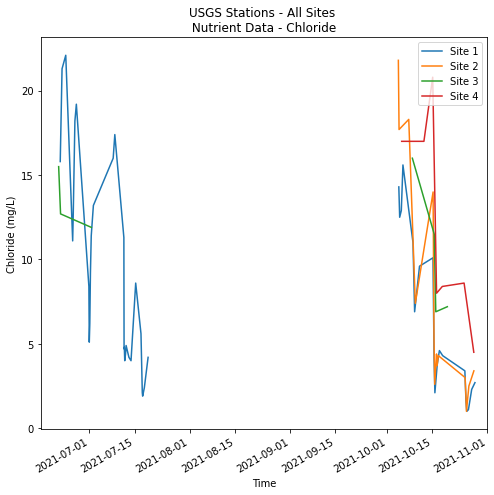

In [49]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='Chloride', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='Chloride')
qw3.plot(ax=ax, x='datetime', y='Chloride')
qw4.plot(ax=ax, x='datetime', y='Chloride')



plt.title('USGS Stations - All Sites \n Nutrient Data - Chloride '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Chloride (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

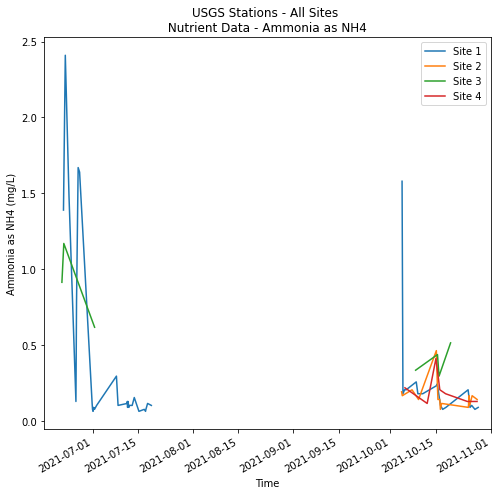

In [50]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='ammoniaNH4', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='ammoniaNH4')
qw3.plot(ax=ax, x='datetime', y='ammoniaNH4')
qw4.plot(ax=ax, x='datetime', y='ammoniaNH4')



plt.title('USGS Stations - All Sites \n Nutrient Data - Ammonia as NH4 '); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Ammonia as NH4 (mg/L)');


#plt.savefig("orgnitro.png")

<Figure size 432x288 with 0 Axes>

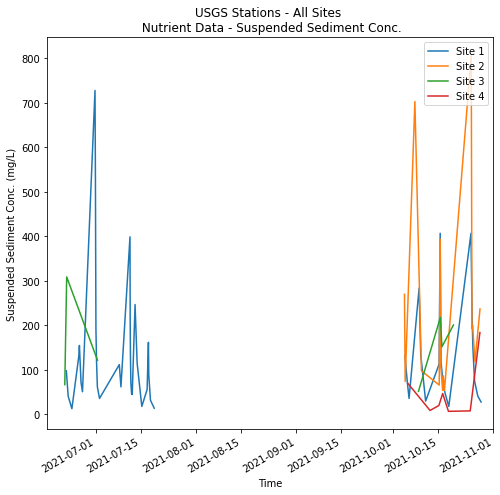

In [51]:
fig1 = plt.figure()
ax = qw1.plot(x='datetime', y='SSC', figsize=(8, 8))
qw2.plot(ax=ax, x='datetime', y='SSC')
qw3.plot(ax=ax, x='datetime', y='SSC')
qw4.plot(ax=ax, x='datetime', y='SSC')



plt.title('USGS Stations - All Sites \n Nutrient Data - Suspended Sediment Conc.'); # station numbers will have to be copy and pasted
plt.legend(['Site 1', 'Site 2', 'Site 3', 'Site 4'],loc='upper right');
ax.set_xlim([pd.to_datetime('2021-06-15 23:50:00'), pd.to_datetime('2021-11-01 00:10:00')])
plt.xlabel('Time');
plt.ylabel('Suspended Sediment Conc. (mg/L)');


#plt.savefig("orgnitro.png")

These plots can be a bit difficult to make heads and tails of, due primarily to the limited sampling times given the duration of time. The larger spikes are 